## Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold

In [2]:
iris = datasets.load_iris()

### 1.
#### a) Use pd.plotting.scatter_matrix() to create a scatter plot matrix of the features. The scatter plot should color the data points by the target variable category (setosa, versicolor, virginica). An example is shown in Blackboard.

In [3]:
from sklearn.model_selection import train_test_split

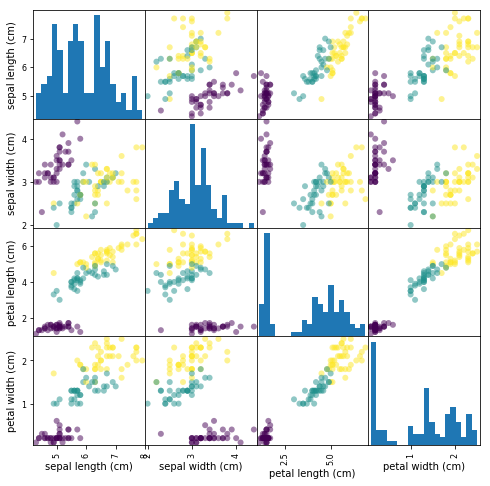

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)

grr = pd.plotting.scatter_matrix(iris_dataframe,marker='o',c = y_train, hist_kwds={'bins':20},  figsize=(8,8))

#### b) Find the accuracy rate of performing LOOCV cross validation.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [6]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])
response = pd.DataFrame((iris.target == 2).astype(np.int), columns=['response'])
loo = LeaveOneOut()
measure = 'accuracy'

In [7]:
scores = cross_val_score(LogisticRegression(solver = 'lbfgs'),data, response.iloc[:,0],
cv=loo, scoring = measure)
scores.mean()

0.9733333333333334

#### ans: 97.33%

#### c) Find the accuracy rate of 5-fold cross validation when using (i) shuffle = True, and (ii) shuffle = False, as second argument in kfold = KFold(n_splits = 5, shuffle = ..., random_state = 0)

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [9]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [10]:
log_reg = LogisticRegression(solver='lbfgs')

In [14]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
X = iris['data']
y = iris['target']
dy = pd.DataFrame()
dy['iris'] = y
dy2 = dy.copy()
dy2 = dy2.replace((0,1,2),(0,0,1))
y = dy2.values
y = y.ravel()

In [15]:
result1 = cross_val_score(log_reg, X, y, cv=kfold);

In [16]:
# accuracy rate

In [17]:
result1.mean()

0.9533333333333334

In [18]:
kfold2 = KFold(n_splits = 5, shuffle = False, random_state = 0)

In [19]:
result2 = cross_val_score(log_reg, X, y, cv=kfold2)

In [20]:
result2.mean()

0.9266666666666665

#### Ans: accuracy 95.33%  when shuffle = True, accuracy 92.66% when shuffle = False

### 2.
#### a) Fit separate simple logistic regression models for predicting Y against each individual predictor. Write the fitted equation for each one.

In [21]:
 import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
data = pd.read_csv('flushots.txt', sep=r'\s{2,}', header=None, names=["shot", "age", "index", "gender"])
data = data[1:]
data = data.reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [23]:
for i in range(0, len(data['index'])):
    data['index'][i] = int(data['index'][i])
for i in range(0, len(data['age'])):
    data['age'][i] = int(data['age'][i])
for i in range(0, len(data['gender'])):
    data['gender'][i] = int(data['gender'][i])
for i in range(0, len(data['shot'])):
    data['shot'][i] = int(data['shot'][i])

In [27]:
array = data.values
age = array[:,1].astype(int)
index = array[:,2].astype(int)
gender = array[:,3].astype(int) 
response = array[:,0].astype(int)
pred = [age, index, gender]

In [28]:
model_age = LogisticRegression(solver='lbfgs').fit(age.reshape(-1,1),response)
model_age.coef_

array([[0.10865534]])

In [29]:
model_age.intercept_

array([-8.7378005])

In [30]:
model_i = LogisticRegression(solver='lbfgs').fit(index.reshape(-1,1),response)
model_i.coef_

array([[-0.11920217]])

In [31]:
model_i.intercept_

array([4.90561189])

In [32]:
model_g = LogisticRegression(solver='lbfgs').fit(gender.reshape(-1,1),response)
model_g.coef_

array([[0.53448438]])

In [33]:
model_g.intercept_

array([-2.0142995])

#### Ans: 
#### (shot-age) Y = 1/(1 + exp(8.7433-0.1087*age)) 
#### (shot-health_awareness) Y = 1/(1 + exp(-4.9113+0.1193*health_awareness)) 
#### (shot-gender) Y = 1/(1 + exp(2.0794-0.6443*gender))

#### b) For each model find the probability that male clients aged 55 with a health awareness index of 60 will receive a flu shot.

In [34]:
age = sm.add_constant(age)
index = sm.add_constant(index)
gender = sm.add_constant(gender)

In [35]:
model1 = sm.GLM(shot,age,family=sm.families.Binomial()).fit()
model1.predict([1,55])

array([0.05937092])

In [36]:
model2 = sm.GLM(shot,index,family=sm.families.Binomial()).fit()
model2.predict([1,60])

array([0.09558884])

In [37]:
model3 = sm.GLM(shot, gender,family=sm.families.Binomial()).fit()
model3.predict([1, 1])

array([0.19230769])

#### Ans: age 55 : 0.05937092, index 60 : 0.09558884,  male : 0.19230769

#### c) Which model fits best, which one predicts best? why?

In [38]:
model1.deviance

116.26695826327159

In [39]:
model2.deviance

113.19579725936083

In [40]:
model3.deviance

132.88089493174806

In [41]:
model1.aic

120.26695826327159

In [42]:
model2.aic

117.19579725936084

In [43]:
model3.aic

136.88089493174806

In [44]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [46]:
age = array[:,1].astype(int)
result1 = cross_val_score(model_age, age.reshape(-1, 1), response, cv=kfold)
result1.mean()

0.8431451612903226

In [49]:
index = array[:,2].astype(int)
result2 = cross_val_score(model_i, index.reshape(-1, 1), response, cv=kfold)
result2.mean()

0.8556451612903226

In [50]:
gender = array[:,3].astype(int)
result3 = cross_val_score(model_g, gender.reshape(-1, 1), response, cv=kfold)
result3.mean()

0.8493951612903226

#### Ans: 
#### according to the deviance, the best fit is the health awareness
#### since MSPE and accuracy's defintion is opposite, the best predictor is also health awareness


#### d)  Plot fitted equation and scatterplot for model with predictor age. Separately, plot fitted equation and scatterplot for model with predictor health index.

In [52]:
xaxis = range(40,90)

In [53]:
yaxis = model1.predict(sm.add_constant(xaxis))

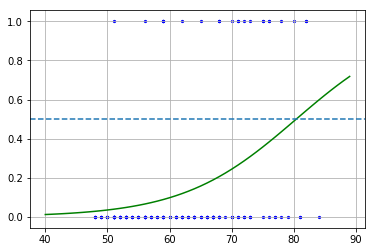

In [55]:
plt.scatter(age, response, c='b',s=5)
plt.plot(xaxis,yaxis, c='g')
plt.axhline(y=0.5,ls='--')
plt.grid()

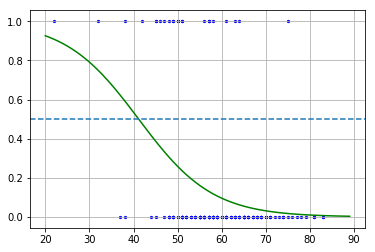

In [58]:
xaxis = range(20,90)
yaxis = model2.predict(sm.add_constant(xaxis))
plt.scatter(index, response, c='b',s=5)
plt.plot(xaxis,yaxis, c='g')
plt.axhline(y=0.5,ls='--')
plt.grid()

### 3. A logistic regression model is fitted. It is found that b0 = −25 and b1 = 0.20.
#### a)  Write the fitted equation.

$\hat \pi_i = \frac{1}{1+e^{25-0.2x_i}}$

#### b) For what value of X is the mean response equal to 0.50?

$0.5(1 + e^{25-0.2x_i}) = 1$<br>
$e^{25-0.2x} = 0.5$<br>
x = 125

#### c) Find the ratio of the odds when X = 160 to that when X = 150

$O_2/O_1 = e^{\beta_1(x_2-x_1)}$

$e^{0.2(160-150)}=e^{2}=7.38905$